# Introduction
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

**What?** Average True Range (ATR)

</font>
</div>

# Definition
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- Volatility can be thought as the equivalent as risk.
- The Average True Range (ATR) is a moving average of the True Range (TR). And the TR is given by the maximum of the current high (H) minus current low (L), the absolute value of current high (H) minus previous close (Cp), and the absolute value of current low (L) and previous close (Cp).

</font>
</div>

$TR = \max[H − L, |H − C_P|, |L − C_P|]$

$ATR = \frac{1}{n}\sum_{i=1}^{n} TR_i$

- $TR_i$: A particular True Range
- $n$: The time period employed
- $H$: Current High
- $L$: Current Low
- $C_P$: Previous Close

# Imports
<hr style = "border:2px solid black" ></hr>

In [19]:
import numpy as np
import pandas_datareader as pdr
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

# Import data
<hr style = "border:2px solid black" ></hr>

In [2]:
# NLFLX is the netflix stock price
start = dt.datetime(2020, 1, 1)
data = pdr.get_data_yahoo("NFLX", start)

In [3]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,329.980011,324.779999,326.100006,329.809998,4485800,329.809998
2020-01-03,329.859985,325.529999,326.779999,325.899994,3806900,325.899994
2020-01-06,336.359985,321.200012,323.119995,335.829987,5663100,335.829987
2020-01-07,336.700012,330.299988,336.470001,330.750000,4703200,330.750000
2020-01-08,342.700012,331.049988,331.489990,339.260010,7104500,339.260010


# ATR
<hr style = "border:2px solid black" ></hr>

In [4]:
high_low = data['High'] - data['Low']
high_cp = np.abs(data['High'] - data['Close'].shift())
low_cp = np.abs(data['Low'] - data['Close'].shift())

In [5]:
df = pd.concat([high_low, high_cp, low_cp], axis=1)

In [6]:
true_range = np.max(df, axis=1)

In [7]:
average_true_range = true_range.rolling(14).mean()

In [8]:
average_true_range

Date
2020-01-02         NaN
2020-01-03         NaN
2020-01-06         NaN
2020-01-07         NaN
2020-01-08         NaN
                ...   
2022-08-22    9.120004
2022-08-23    9.042860
2022-08-24    9.267145
2022-08-25    9.132859
2022-08-26    9.007859
Length: 669, dtype: float64

In [9]:
true_range.rolling(14).sum()/14

Date
2020-01-02         NaN
2020-01-03         NaN
2020-01-06         NaN
2020-01-07         NaN
2020-01-08         NaN
                ...   
2022-08-22    9.120004
2022-08-23    9.042860
2022-08-24    9.267145
2022-08-25    9.132859
2022-08-26    9.007859
Length: 669, dtype: float64

# Visualisation against stock price
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- In periods with **big** changes in price, the ATR moves **up**. 
- In periods with **small** changes in price, the ATR moves **down**. 

</font>
</div>

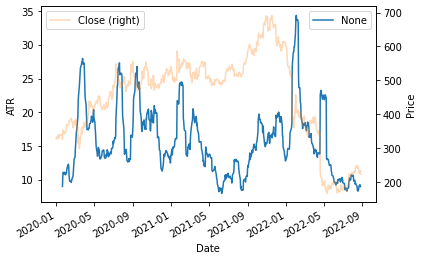

In [18]:
fig, ax = plt.subplots()
average_true_range.plot(ax=ax)
ax2 = data['Close'].plot(ax=ax, secondary_y=True, alpha=.3)
ax.set_ylabel("ATR")
ax2.set_ylabel("Price")
ax.legend()
ax2.legend()

# References
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

- [GitHub code](https://github.com/LearnPythonWithRune/PythonForFinanceRiskAndReturn/blob/main/02%20-%20Volatitlity.ipynb)
- [Volatility](https://www.investopedia.com/terms/v/volatility.asp)
- [Average True Range](https://www.investopedia.com/terms/a/atr.asp)

</font>
</div>